In [4]:
# código para permitir acesso ao meu google drive, assim poderei importar os dados, sem precisar fazer upload
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Exercício - Idade census

In [5]:
import pandas as pd 
caminho = '/content/gdrive/MyDrive/Colab Notebooks/IA expert /Estatística para ciência de dados/exercícios/census.csv'
data = pd.read_csv(caminho)
data.head(3)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [6]:
# distribuição de frequencia utilizando o atributo idade 

In [8]:
data['age'].max(), data['age'].min()

(90, 17)

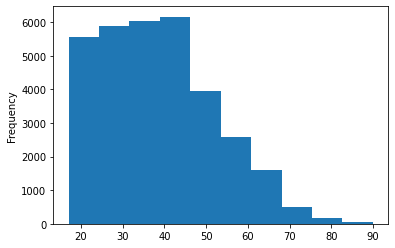

In [10]:
data['age'].plot.hist();

In [12]:
# criando faixas personalizadas, utilizando a função (cut), para segmentar os dados de divisões (bins)
data['age'] = pd.cut(data['age'], bins=[0,17,25,40,60,90], labels = ['Faixa1', 'Faixa2', 'Faixa3', 'Faixa4', 'Faixa5'])

In [13]:
data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,Faixa3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Faixa4,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Faixa3,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Faixa4,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Faixa3,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
#conferindo as faixas de idades 
data['age'].unique()

['Faixa3', 'Faixa4', 'Faixa2', 'Faixa5', 'Faixa1']
Categories (5, object): ['Faixa1' < 'Faixa2' < 'Faixa3' < 'Faixa4' < 'Faixa5']

#Regras de associação 

In [15]:
data.head(3)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,Faixa3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Faixa4,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Faixa3,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [16]:
# REGRA DE ASSOCIAÇÃO COM APRIORI, importante lembrar que, não podemos utilizar dados numéricos
# os dados devem ser categóricos na forma de "STRING", por isso a distribuição de frequência (exercício acima)

In [18]:
#passei apenas dados categóricos, por serem varias colunas devo utilziar 2 conchetes 
data_apriori = data[['age', 'workclass', 'education', 'marital-status', 'relationship', 'occupation', 'sex', 'native-country', 'income']]

In [19]:
data_apriori.head(3)

,age,workclass,education,marital-status,relationship,occupation,sex,native-country,income
0,Faixa3,State-gov,Bachelors,Never-married,Not-in-family,Adm-clerical,Male,United-States,<=50K
1,Faixa4,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,Exec-managerial,Male,United-States,<=50K
2,Faixa3,Private,HS-grad,Divorced,Not-in-family,Handlers-cleaners,Male,United-States,<=50K


In [21]:
data_apriori.shape, data.shape

((32561, 9), (32561, 15))

In [22]:
#vamos fazer os testes, em uma porção menor dos dados, para que o processo seja mais rapido 
data_apriori = data_apriori.sample(n = 1000)
data_apriori.shape

(1000, 9)

In [23]:
transacoes = []
for i in range(data_apriori.shape[0]):
  transacoes.append([str(data_apriori.values[i, j]) for j in range(data_apriori.shape[1])])

In [24]:
len(transacoes)

1000

In [25]:
#estamos com os mesmos dados, porém agora no formato de lista. para que possamos manipular
transacoes[:2]

[['Faixa4',
  ' Local-gov',
  ' Masters',
  ' Married-civ-spouse',
  ' Husband',
  ' Prof-specialty',
  ' Male',
  ' United-States',
  ' >50K'],
 ['Faixa4',
  ' Self-emp-not-inc',
  ' Bachelors',
  ' Married-civ-spouse',
  ' Husband',
  ' Farming-fishing',
  ' Male',
  ' United-States',
  ' <=50K']]

In [26]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=89c2cca1d892ce9b0e6149860fcd24cbd3f487a4105f85abe469f85f4f8a6be8
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [27]:
from apyori import apriori

In [28]:
regras = apriori(transacoes, min_support = 0.3, min_confidence = 0.2)
resultados = list(regras)

In [29]:
len(resultados)

38

In [30]:
resultados

[RelationRecord(items=frozenset({' <=50K'}), support=0.773, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' <=50K'}), confidence=0.773, lift=1.0)]),
 RelationRecord(items=frozenset({' Female'}), support=0.336, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Female'}), confidence=0.336, lift=1.0)]),
 RelationRecord(items=frozenset({' HS-grad'}), support=0.324, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' HS-grad'}), confidence=0.324, lift=1.0)]),
 RelationRecord(items=frozenset({' Husband'}), support=0.393, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Husband'}), confidence=0.393, lift=1.0)]),
 RelationRecord(items=frozenset({' Male'}), support=0.664, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Male'}), confidence=0.664, lift=1.0)]),
 RelationRecord(items=frozenset({' Married-civ-spouse'}), support=0